# Google Colab Lab Assignment 1

**Course Name:** Deep Learning

**Lab Title:** Lab Assignment 1 -Neural Network Implementation from Scratch(Individual Lab Task)

**Student Name:** Pranav Khatavkar

**Student ID:** 202201090028

In [26]:
import numpy as np

# Sigmoid Activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative for backprop
def sigmoid_derivative(x):
    return x * (1 - x)

# Set random seed for reproducibility
np.random.seed(42)

# Initialize weights and biases for 2 neurons
weights_hidden = np.random.randn(2, 2)
bias_hidden = np.zeros((1, 2))
weights_output = np.random.randn(2, 1)
bias_output = np.zeros((1, 1))

# Learning rate
lr = 0.1


In [27]:
# XOR dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Training
epochs = 5000
losses_2neurons = []

for epoch in range(epochs):
    # Forward
    hidden_input = np.dot(X, weights_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, weights_output) + bias_output
    y_pred = sigmoid(final_input)

    # Loss (MSE)
    loss = np.mean((y - y_pred) ** 2)
    losses_2neurons.append(loss)

    # Backward
    error = y - y_pred
    d_output = error * sigmoid_derivative(y_pred)

    error_hidden = d_output.dot(weights_output.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_output)

    # Update weights and biases
    weights_output += hidden_output.T.dot(d_output) * lr
    bias_output += np.sum(d_output, axis=0, keepdims=True) * lr
    weights_hidden += X.T.dot(d_hidden) * lr
    bias_hidden += np.sum(d_hidden, axis=0, keepdims=True) * lr

# Final predictions
final_hidden = sigmoid(np.dot(X, weights_hidden) + bias_hidden)
final_output = sigmoid(np.dot(final_hidden, weights_output) + bias_output)
predictions_2neurons = (final_output > 0.5).astype(int)

print("Predictions (2 neurons):")
print(predictions_2neurons)


Predictions (2 neurons):
[[0]
 [0]
 [1]
 [1]]


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc2 = accuracy_score(y, predictions_2neurons)
prec2 = precision_score(y, predictions_2neurons)
rec2 = recall_score(y, predictions_2neurons)
f12 = f1_score(y, predictions_2neurons)

print(f"2 Neurons Model Metrics:\nAccuracy: {acc2:.4f}, Precision: {prec2:.4f}, Recall: {rec2:.4f}, F1-Score: {f12:.4f}")


2 Neurons Model Metrics:
Accuracy: 0.5000, Precision: 0.5000, Recall: 0.5000, F1-Score: 0.5000


In [29]:
# Initialize weights and biases for 4 neurons
np.random.seed(42)
weights_hidden4 = np.random.randn(2, 4)
bias_hidden4 = np.zeros((1, 4))
weights_output4 = np.random.randn(4, 1)
bias_output4 = np.zeros((1, 1))

# Learning rate
lr = 0.1


In [30]:
# Training
epochs = 5000
losses_4neurons = []

for epoch in range(epochs):
    # Forward
    hidden_input4 = np.dot(X, weights_hidden4) + bias_hidden4
    hidden_output4 = sigmoid(hidden_input4)
    final_input4 = np.dot(hidden_output4, weights_output4) + bias_output4
    y_pred4 = sigmoid(final_input4)

    # Loss (MSE)
    loss4 = np.mean((y - y_pred4) ** 2)
    losses_4neurons.append(loss4)

    # Backward
    error4 = y - y_pred4
    d_output4 = error4 * sigmoid_derivative(y_pred4)

    error_hidden4 = d_output4.dot(weights_output4.T)
    d_hidden4 = error_hidden4 * sigmoid_derivative(hidden_output4)

    # Update weights and biases
    weights_output4 += hidden_output4.T.dot(d_output4) * lr
    bias_output4 += np.sum(d_output4, axis=0, keepdims=True) * lr
    weights_hidden4 += X.T.dot(d_hidden4) * lr
    bias_hidden4 += np.sum(d_hidden4, axis=0, keepdims=True) * lr

# Final predictions
final_hidden4 = sigmoid(np.dot(X, weights_hidden4) + bias_hidden4)
final_output4 = sigmoid(np.dot(final_hidden4, weights_output4) + bias_output4)
predictions_4neurons = (final_output4 > 0.5).astype(int)

print("Predictions (4 neurons):")
print(predictions_4neurons)


Predictions (4 neurons):
[[0]
 [1]
 [1]
 [0]]


In [31]:
acc4 = accuracy_score(y, predictions_4neurons)
prec4 = precision_score(y, predictions_4neurons)
rec4 = recall_score(y, predictions_4neurons)
f14 = f1_score(y, predictions_4neurons)

print(f"4 Neurons Model Metrics:\nAccuracy: {acc4:.4f}, Precision: {prec4:.4f}, Recall: {rec4:.4f}, F1-Score: {f14:.4f}")


4 Neurons Model Metrics:
Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-Score: 1.0000


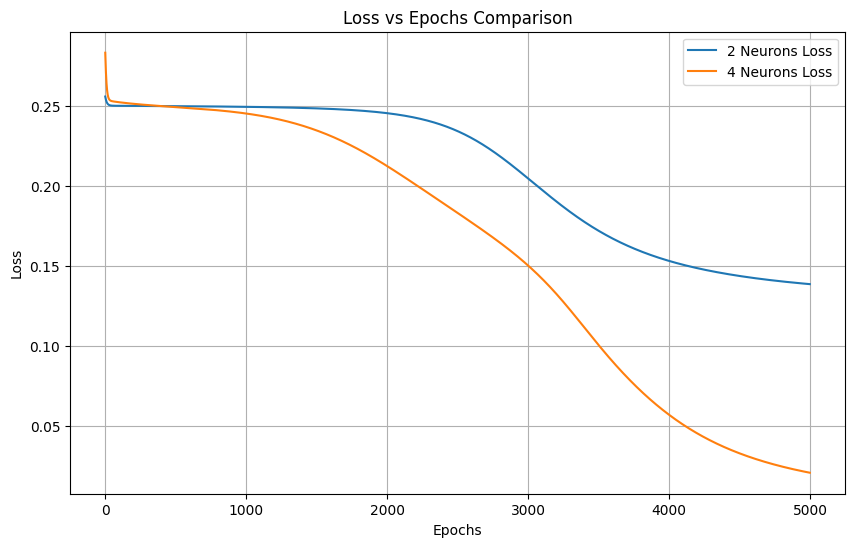


Final Comparison:
2 Neurons -> Accuracy: 0.5000, F1-Score: 0.5000
4 Neurons -> Accuracy: 1.0000, F1-Score: 1.0000


In [32]:
import matplotlib.pyplot as plt

# Compare Loss Curves
plt.figure(figsize=(10,6))
plt.plot(losses_2neurons, label='2 Neurons Loss')
plt.plot(losses_4neurons, label='4 Neurons Loss')
plt.title('Loss vs Epochs Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Print Final Comparison
print("\nFinal Comparison:")
print(f"2 Neurons -> Accuracy: {acc2:.4f}, F1-Score: {f12:.4f}")
print(f"4 Neurons -> Accuracy: {acc4:.4f}, F1-Score: {f14:.4f}")


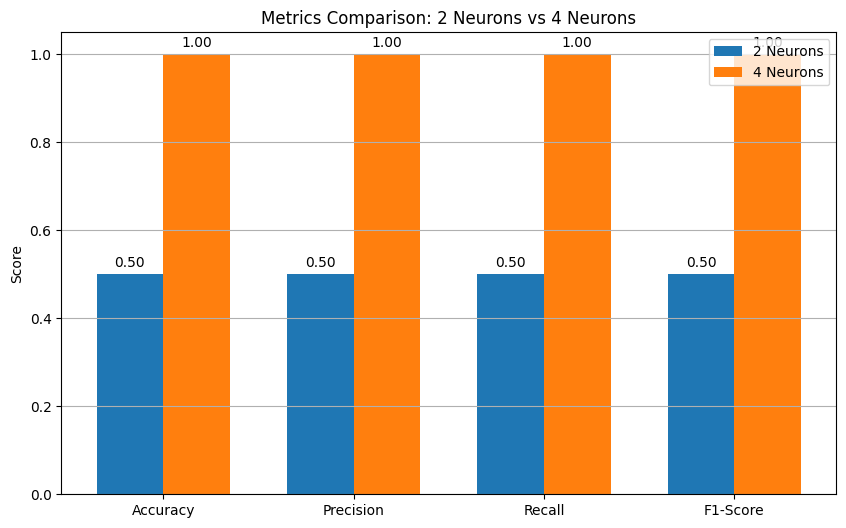

In [34]:
# 10. Plot Metric Comparison
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
model2_scores = [acc2, prec2, rec2, f12]
model4_scores = [acc4, prec4, rec4, f14]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
bars1 = ax.bar(x - width/2, model2_scores, width, label='2 Neurons')
bars2 = ax.bar(x + width/2, model4_scores, width, label='4 Neurons')

ax.set_ylabel('Score')
ax.set_title('Metrics Comparison: 2 Neurons vs 4 Neurons')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(True, axis='y')

# Add values on bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


I, Pranav Khatavkar, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account.

GitHub link:

Signature: Pranav Khatavkar